In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# imports
import sys
sys.path.append("..")
#import os
#import shutil

from utils.model import Net_mask
import torch
#from torch.distributions.multivariate_normal import MultivariateNormal

import matplotlib.pyplot as plt
import numpy as np

In [5]:
num = 0
e = 5

In [6]:
model = Net_mask()
model.load_state_dict(torch.load(f'../data/@/weight_init/rml_e{e}_{num}.pth'))
init_weights = torch.cat([param.view(-1) for param in model.parameters()])
#model.load_state_dict(torch.load(f'../saved_models/testing/rml/long/e{e}/{num}/model_weights.pth'))
model.load_state_dict(torch.load(f'../saved_models/testing/rml/long/e4/{num}/model_weights.pth'))
posterior_weights = torch.cat([param.view(-1) for param in model.parameters()])
#n_param = len(prior_weights)
#print(n_param)

(array([0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        2.000e+00, 7.000e+00, 4.000e+00, 5.000e+00, 8.000e+00, 7.000e+00,
        1.600e+01, 2.600e+01, 2.100e+01, 3.000e+01, 4.800e+01, 5.900e+01,
        5.900e+01, 9.300e+01, 1.300e+02, 1.640e+02, 2.050e+02, 2.520e+02,
        3.190e+02, 3.900e+02, 4.140e+02, 4.840e+02, 6.280e+02, 7.680e+02,
        9.010e+02, 1.507e+03, 1.558e+03, 8.750e+02, 7.340e+02, 6.780e+02,
        5.540e+02, 4.480e+02, 3.710e+02, 2.930e+02, 2.390e+02, 2.020e+02,
        1.750e+02, 1.170e+02, 8.300e+01, 7.400e+01, 5.600e+01, 4.800e+01,
        3.400e+01, 1.900e+01, 1.500e+01, 1.500e+01, 1.500e+01, 7.000e+00,
        1.300e+01, 7.000e+00, 6.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        5.000e+00, 1.000e+00, 0.000e+0

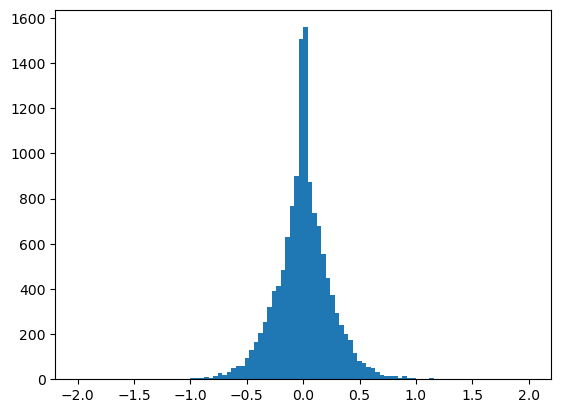

In [7]:
plt.hist(posterior_weights.detach(), range=[-2, 2], bins=100)

In [8]:
print(list(model.parameters())[0].shape)
print(list(model.parameters())[1].shape)
print(list(model.parameters())[2].shape)
print(list(model.parameters())[3].shape)
print(list(model.parameters())[4].shape)
print(list(model.parameters())[5].shape)

torch.Size([100, 20])
torch.Size([100])
torch.Size([100, 100])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


In [9]:
posterior_weights_1 = torch.cat([param.view(-1) for param in list(model.parameters())[0]])
posterior_weights_2 = torch.cat([param.view(-1) for param in list(model.parameters())[2]])
posterior_weights_3 = torch.cat([param.view(-1) for param in list(model.parameters())[4]])
posterior_weights_all = torch.cat([param.view(-1) for param in list(model.parameters())])
print(len(posterior_weights_1))
print(len(posterior_weights_2))
print(len(posterior_weights_3))
print(len(posterior_weights_all))

2000
10000
1000
13210


In [10]:
posterior_weights = torch.cat([param.view(-1) for param in model.parameters()])
len(posterior_weights)

13210

In [11]:
print(torch.min(posterior_weights))
print(torch.max(posterior_weights))

tensor(-2.2367, grad_fn=<MinBackward1>)
tensor(1.4605, grad_fn=<MaxBackward1>)


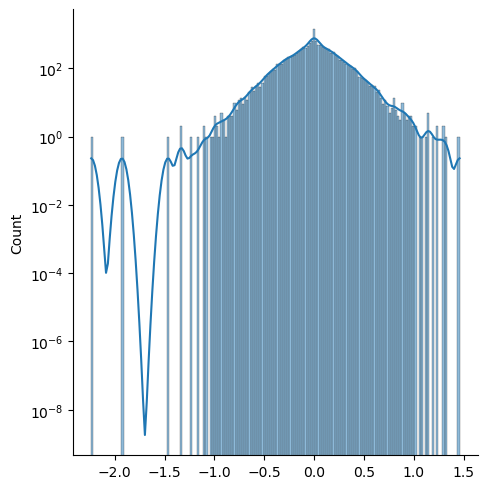

In [12]:
import numpy as np
import seaborn as sns


#a = np.random.normal(mu,sigma,n)
#sns.displot(posterior_weights.detach(), log_scale=True)
#sns.displot(posterior_weights.detach(), kind="kde")
a = sns.displot(posterior_weights.detach(), kde=True)
#a = sns.displot(posterior_weights.detach(), kind="kde")
#a.axes[0].set_yscale('log')
#a.set(xlim=(-2, 2))
plt.yscale('log')
#a.set(ylim=(0,0.01))
#a.set(ylim=(0,1))

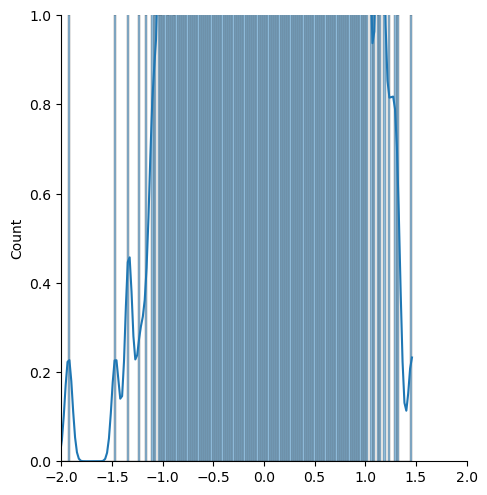

In [13]:
import numpy as np
import seaborn as sns

n = 50000  # sample size
mu = 0  # mean
sigma = 1  # sd

#a = np.random.normal(mu,sigma,n)
#sns.displot(posterior_weights.detach(), log_scale=True)
#sns.displot(posterior_weights.detach(), kind="kde")
a = sns.displot(posterior_weights.detach(), kde=True)
#a = sns.displot(posterior_weights.detach(), kind="kde")
a.set(xlim=(-2, 2))
#a.set(ylim=(0,0.01))
a.set(ylim=(0,1))

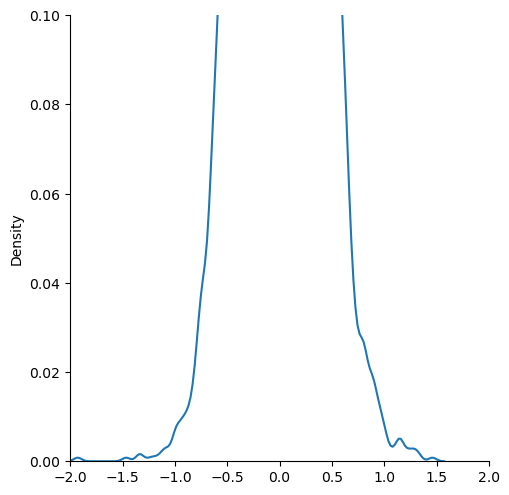

In [14]:
import numpy as np
import seaborn as sns

#a = np.random.normal(mu,sigma,n)
#sns.displot(posterior_weights.detach(), log_scale=True)
#sns.displot(posterior_weights.detach(), kind="kde")
#a = sns.displot(posterior_weights.detach(), kde=True)
a = sns.displot(posterior_weights.detach(), kind="kde")
a.set(xlim=(-2, 2))
#a.set(ylim=(0,0.01))
a.set(ylim=(0,0.1))

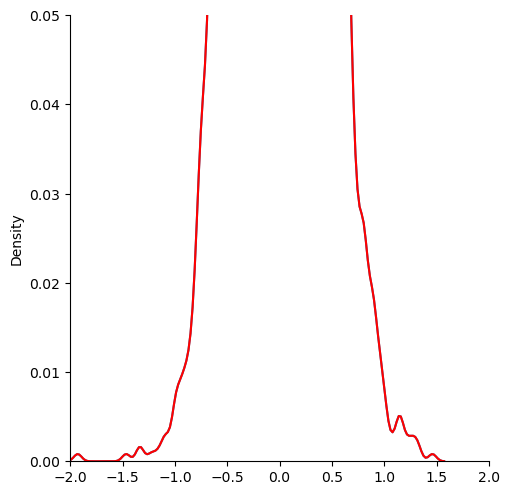

In [15]:
g = sns.displot(posterior_weights.detach(), kind="kde")
g.set(xlim=(-2, 2))
g.set(ylim=(0,0.05))
ax = g.axes[0, 0]
line = ax.lines[0]
x, y = line.get_data()
ax.plot(x, y, "r")

In [16]:
print(len(x))
print(len(y))
print(y)

200
200
[9.02391227e-06 3.84412472e-05 1.23669354e-04 3.00461429e-04
 5.51286531e-04 7.63885121e-04 7.99356914e-04 6.31706633e-04
 3.77009378e-04 1.69922499e-04 5.78377964e-05 1.48676637e-05
 2.89060596e-06 4.75663050e-07 5.14898531e-07 3.15278877e-06
 1.59986865e-05 6.13850121e-05 1.77872548e-04 3.89240125e-04
 6.43262593e-04 8.02825221e-04 7.56686061e-04 5.38607598e-04
 2.89528442e-04 1.17536298e-04 3.60341927e-05 8.34294927e-06
 1.45876866e-06 1.92626158e-07 1.92090601e-08 1.44663724e-09
 8.23668325e-11 6.38191471e-12 6.76527336e-11 1.20952326e-09
 1.63583529e-08 1.67081337e-07 1.28877866e-06 7.50742105e-06
 3.30267177e-05 1.09724409e-04 2.75302750e-04 5.21707489e-04
 7.47146112e-04 8.11618372e-04 6.84363071e-04 5.08746512e-04
 4.97300132e-04 7.66319419e-04 1.22199848e-03 1.57806573e-03
 1.57809565e-03 1.25750015e-03 9.12601234e-04 7.89923656e-04
 8.77457433e-04 1.00894325e-03 1.09552144e-03 1.19521817e-03
 1.40409027e-03 1.77107927e-03 2.26716602e-03 2.74642213e-03
 3.05207731e-03 

In [ ]:
f_list = list(range(100)) 
f_len = len(f_list)
areas_num = torch.zeros(2, 4, f_len)
e = 4
e4_x_points = np.zeros((4, f_len, 200))
e4_y_points = np.zeros((4, f_len, 200))
#for idx, e in enumerate([4, 5]):
for idx_num, num in enumerate(f_list):
    #prior_weights = torch.load(f'../data/@/1.0e+0{e}/rml_noise/{num}/noise_parameter.pt')[0]
    #prior_weights *= -1
    #model = Net_mask()
    model.load_state_dict(torch.load(f'../saved_models/testing/rml/long/e{e}/{num}/model_weights.pth'))
    posterior_weights_all = torch.cat([param.view(-1) for param in list(model.parameters())])
    posterior_weights_l1 = torch.cat([param.view(-1) for param in list(model.parameters())[0]])
    posterior_weights_l2 = torch.cat([param.view(-1) for param in list(model.parameters())[2]])
    posterior_weights_l3 = torch.cat([param.view(-1) for param in list(model.parameters())[4]])

    p_all = sns.displot(posterior_weights_all.detach(), kind="kde")
    p_l1 = sns.displot(posterior_weights_l1.detach(), kind="kde")
    p_l2 = sns.displot(posterior_weights_l2.detach(), kind="kde")
    p_l3 = sns.displot(posterior_weights_l3.detach(), kind="kde")
    e4_x_points[0, idx_num], e4_y_points[0, idx_num] = p_all.axes[0,0].lines[0].get_data()
    e4_x_points[1, idx_num], e4_y_points[1, idx_num] = p_l1.axes[0,0].lines[0].get_data()
    e4_x_points[2, idx_num], e4_y_points[2, idx_num] = p_l2.axes[0,0].lines[0].get_data()
    e4_x_points[3, idx_num], e4_y_points[3, idx_num] = p_l3.axes[0,0].lines[0].get_data()


In [ ]:

f_list = list(range(100))
f_len = len(f_list)
areas_num = torch.zeros(2, 4, f_len)
e = 5
e5_x_points = np.zeros((4, f_len, 200))
e5_y_points = np.zeros((4, f_len, 200))
#for idx, e in enumerate([4, 5]):
for idx_num, num in enumerate(f_list):
    #prior_weights = torch.load(f'../data/@/1.0e+0{e}/rml_noise/{num}/noise_parameter.pt')[0]
    #prior_weights *= -1
    #model = Net_mask()
    model.load_state_dict(torch.load(f'../saved_models/testing/rml/long/e{e}/{num}/model_weights.pth'))
    posterior_weights_all = torch.cat([param.view(-1) for param in list(model.parameters())])
    posterior_weights_l1 = torch.cat([param.view(-1) for param in list(model.parameters())[0]])
    posterior_weights_l2 = torch.cat([param.view(-1) for param in list(model.parameters())[2]])
    posterior_weights_l3 = torch.cat([param.view(-1) for param in list(model.parameters())[4]])

    p_all = sns.displot(posterior_weights_all.detach(), kind="kde")
    p_l1 = sns.displot(posterior_weights_l1.detach(), kind="kde")
    p_l2 = sns.displot(posterior_weights_l2.detach(), kind="kde")
    p_l3 = sns.displot(posterior_weights_l3.detach(), kind="kde")
    e5_x_points[0, idx_num], e5_y_points[0, idx_num] = p_all.axes[0,0].lines[0].get_data()
    e5_x_points[1, idx_num], e5_y_points[1, idx_num] = p_l1.axes[0,0].lines[0].get_data()
    e5_x_points[2, idx_num], e5_y_points[2, idx_num] = p_l2.axes[0,0].lines[0].get_data()
    e5_x_points[3, idx_num], e5_y_points[3, idx_num] = p_l3.axes[0,0].lines[0].get_data()


In [19]:
#import matplotlib as mpl
#from matplotlib import cycler
#import matplotlib.pyplot as plt
#import numpy as np

# Fixing random state for reproducibility
#np.random.seed(19680801)

#N = 10
#data = (np.geomspace(1, 10, 100) + np.random.randn(N, 100)).T
#cmap = plt.cm.coolwarm
#mpl.rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))

#fig, ax = plt.subplots()
#lines = ax.plot(data)
#ax.legend()

#from matplotlib.lines import Line2D
#custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
#                Line2D([0], [0], color=cmap(.5), lw=4),
#                Line2D([0], [0], color=cmap(1.), lw=4)]

#custom_lines = [Line2D([0], [0], color='b', lw=4),
#                Line2D([0], [0], color='r', lw=4),
#                Line2D([0], [0], color='g', lw=4),
#                Line2D([0], [0], color='y', lw=4)]
#fig, ax = plt.subplots()
#lines = ax.plot(data)
#ax.legend(custom_lines, ['Cold', 'Medium', 'Hot'])

In [20]:
import matplotlib.lines as mlines

#eight = mlines.Line2D([], [], color='blue', marker='s', ls='', label='8')
#nine = mlines.Line2D([], [], color='blue', marker='D', ls='', label='9')
lw = 2
#all_ = mlines.Line2D([], [], color='blue', ls='-', lw=lw, label='all')
l1 = mlines.Line2D([], [], color='seagreen', ls='-', lw=lw, label='layer 1')
l2 = mlines.Line2D([], [], color='dodgerblue', ls='-', lw=lw, label='layer 2')
l3 = mlines.Line2D([], [], color='darkorange', ls='-', lw=lw, label='layer 3')
# etc etc
#plt.legend(handles=[all_, l1, l2, l3])

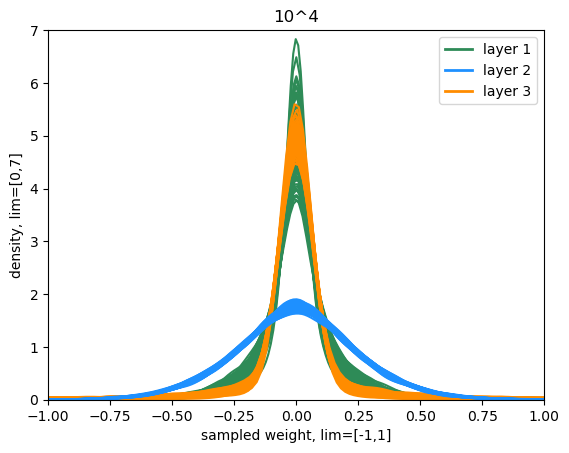

In [30]:
col = ['seagreen', 'dodgerblue', 'darkorange']
#for t in range(4):
x_min = -1
x_max = 1
y_min = 0
y_max = 7
#for t in [1, 2, 3, 0]:
for t in [1, 3, 2]:
    #plt.figure()
    for i in range(f_len):
        plt.plot(e4_x_points[t,i], e4_y_points[t,i], f'{col[t-1]}', alpha=1)
    #plt.plot(np.mean(e4_x_points[t], axis=0), np.mean(e4_y_points[t], axis=0), '-', alpha=1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
plt.title(f'10^4')
plt.legend(handles=[l1, l2, l3])
plt.xlabel(f'sampled weight, lim=[{x_min},{x_max}]')
plt.ylabel(f'density, lim=[{y_min},{y_max}]')
plt.savefig(f'../figures/plot_histogram_posterior/e4_all_layers_xmin_{x_min}_xmax_{x_max}_ymin_{y_min}_ymax_{y_max}.png')

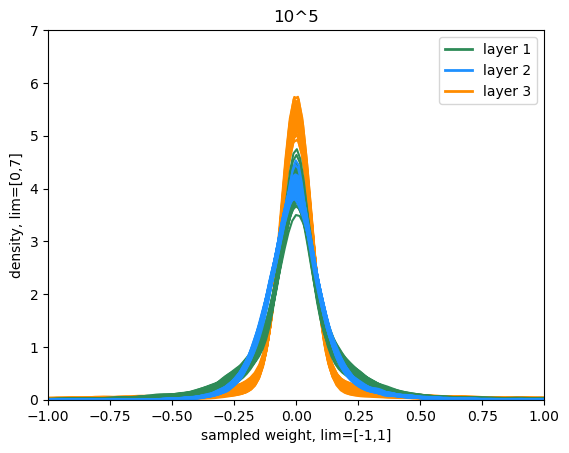

In [31]:
#col = ['b', 'r', 'g', 'y']
#col = ['b', 'r', 'g', 'y']
#col = ['g', 'b', 'r']
#for t in range(4):
x_min = -1
x_max = 1
y_min = 0
y_max = 7
#for t in [1, 2, 3, 0]:
for t in [3, 1, 2]:
    #plt.figure()
    for i in range(f_len):
        plt.plot(e5_x_points[t,i], e5_y_points[t,i], f'{col[t-1]}', alpha=1)
    #plt.plot(np.mean(e4_x_points[t], axis=0), np.mean(e4_y_points[t], axis=0), '-', alpha=1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
#plt.title(f'e5, x=[{x_min},{x_max}], y=[{y_min},{y_max}]')
#plt.legend(custom_lines, ['All', 'Layer 1', 'Layer 2', 'Layer 3'])
plt.title(f'10^5')
plt.legend(handles=[l1, l2, l3])
plt.xlabel(f'sampled weight, lim=[{x_min},{x_max}]')
plt.ylabel(f'density, lim=[{y_min},{y_max}]')
#plt.savefig(f'../figures/plot_histogram_posterior/e5_all_layers_xmin_{x}.png')
plt.savefig(f'../figures/plot_histogram_posterior/e5_all_layers_xmin_{x_min}_xmax_{x_max}_ymin_{y_min}_ymax_{y_max}.png')

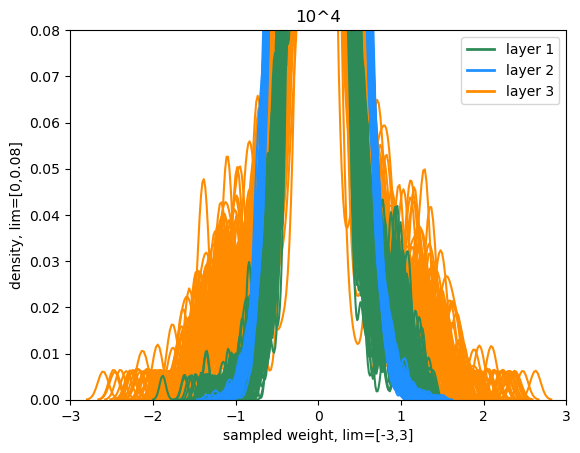

In [32]:
#col = ['b', 'r', 'g', 'y']
#for t in range(4):
x_min = -3
x_max = 3
y_min = 0
y_max = 0.08
#for t in [3, 1, 0, 2]:
for t in [3, 1, 2]:
#for t in [3, 0]:
    #plt.figure()
    for i in range(f_len):
        plt.plot(e4_x_points[t,i], e4_y_points[t,i], f'{col[t-1]}', alpha=1)
    #plt.plot(np.mean(e4_x_points[t], axis=0), np.mean(e4_y_points[t], axis=0), '-', alpha=1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
#plt.title(f'e5, x=[{x_min},{x_max}], y=[{y_min},{y_max}]')
#plt.legend(custom_lines, ['All', 'Layer 1', 'Layer 2', 'Layer 3'])
plt.title(f'10^4')
plt.legend(handles=[l1, l2, l3])
plt.xlabel(f'sampled weight, lim=[{x_min},{x_max}]')
plt.ylabel(f'density, lim=[{y_min},{y_max}]')
plt.savefig(f'../figures/plot_histogram_posterior/e4_all_layers_xmin_{x_min}_xmax_{x_max}_ymin_{y_min}_ymax_{y_max}.png')

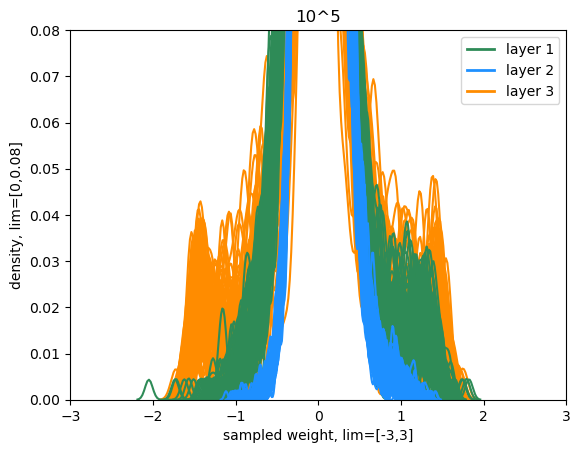

In [33]:
#col = ['b', 'r', 'g', 'y']
#for t in range(4):
x_min = -3
x_max = 3
y_min = 0
y_max = 0.08
for t in [3, 1, 2]:
#for t in [3, 0]:
    #plt.figure()
    for i in range(f_len):
        plt.plot(e5_x_points[t,i], e5_y_points[t,i], f'{col[t-1]}', alpha=1)
    #plt.plot(np.mean(e4_x_points[t], axis=0), np.mean(e4_y_points[t], axis=0), '-', alpha=1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
#plt.title(f'e5, x=[{x_min},{x_max}], y=[{y_min},{y_max}]')
#plt.legend(custom_lines, ['All', 'Layer 1', 'Layer 2', 'Layer 3'])
plt.title(f'10^5')
plt.legend(handles=[l1, l2, l3])
plt.xlabel(f'sampled weight, lim=[{x_min},{x_max}]')
plt.ylabel(f'density, lim=[{y_min},{y_max}]')
plt.savefig(f'../figures/plot_histogram_posterior/e5_all_layers_xmin_{x_min}_xmax_{x_max}_ymin_{y_min}_ymax_{y_max}.png')

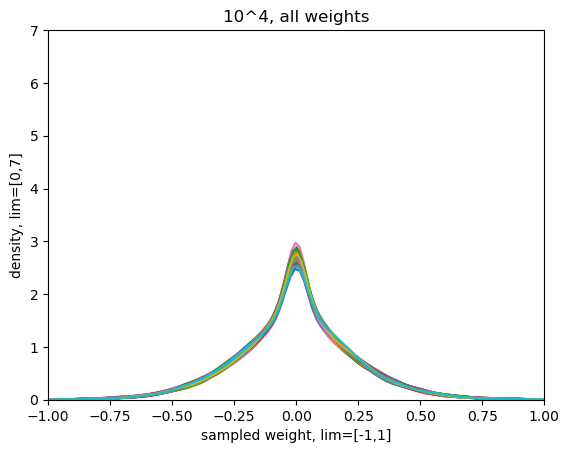

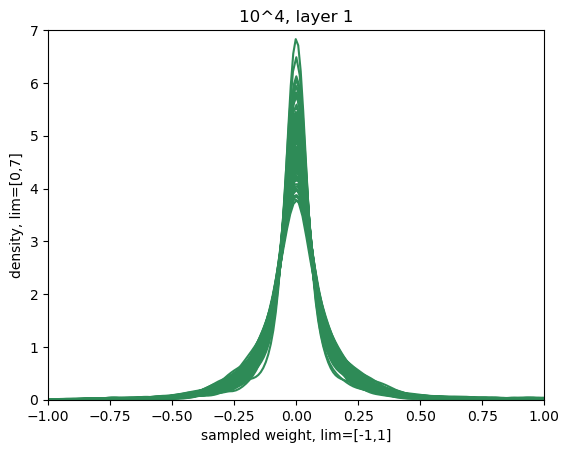

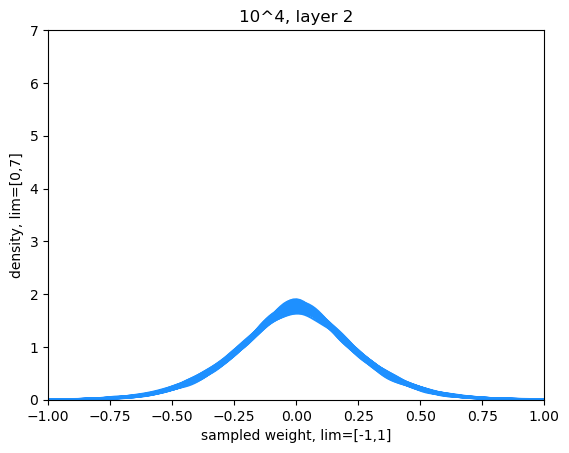

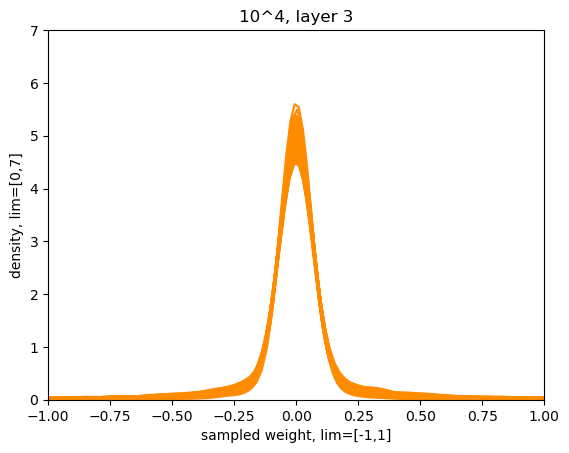

In [35]:
x_min = -1
x_max = 1
y_min = 0
y_max = 7
col = ['', 'seagreen', 'dodgerblue', 'darkorange']
title_ = ['all weights', 'layer 1', 'layer 2', 'layer 3']
layers = ['all', 1, 2, 3]
for t in range(4):
    plt.figure()
    for i in range(f_len):
        plt.plot(e4_x_points[t,i], e4_y_points[t,i], f'{col[t]}')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel(f'sampled weight, lim=[{x_min},{x_max}]')
    plt.ylabel(f'density, lim=[{y_min},{y_max}]')
    #plt.title(f'e4, layer={layers[t]}, x=[{x_min},{x_max}], y=[{y_min},{y_max}]')
    plt.title(f'10^4, {title_[t]}')
    plt.savefig(f'../figures/plot_histogram_posterior/e4_layer_{layers[t]}_xmin_{x_min}_xmax_{x_max}_ymin_{y_min}_ymax_{y_max}.png')

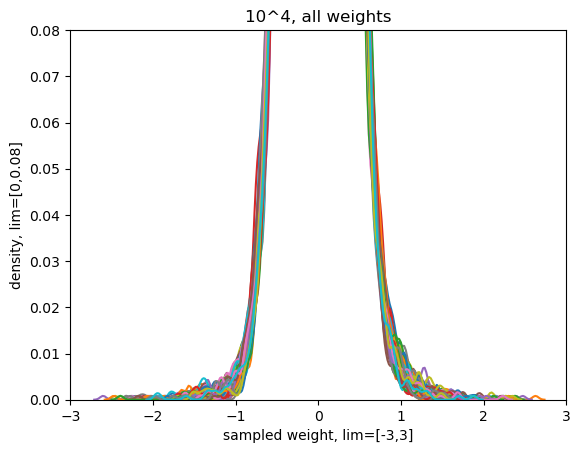

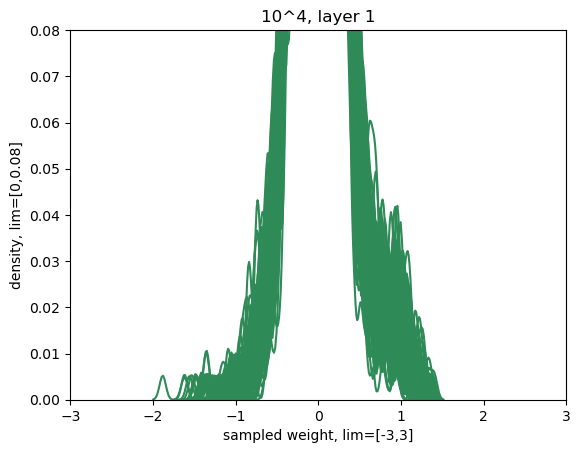

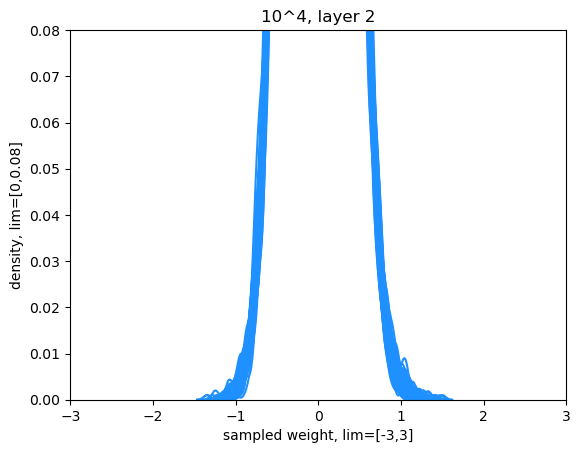

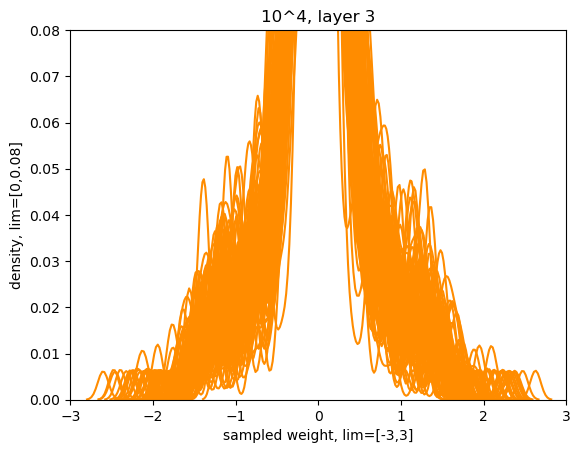

In [36]:
x_min = -3
x_max = 3
y_min = 0
y_max = 0.08
layers = ['all', 1, 2, 3]
for t in range(4):
    plt.figure()
    for i in range(f_len):
        #plt.plot(e4_x_points[t,i], e4_y_points[t,i], alpha=1)
        plt.plot(e4_x_points[t,i], e4_y_points[t,i], f'{col[t]}')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel(f'sampled weight, lim=[{x_min},{x_max}]')
    plt.ylabel(f'density, lim=[{y_min},{y_max}]')
    plt.title(f'10^4, {title_[t]}')
    plt.savefig(f'../figures/plot_histogram_posterior/e4_layer_{layers[t]}_xmin_{x_min}_xmax_{x_max}_ymin_{y_min}_ymax_{y_max}.png')

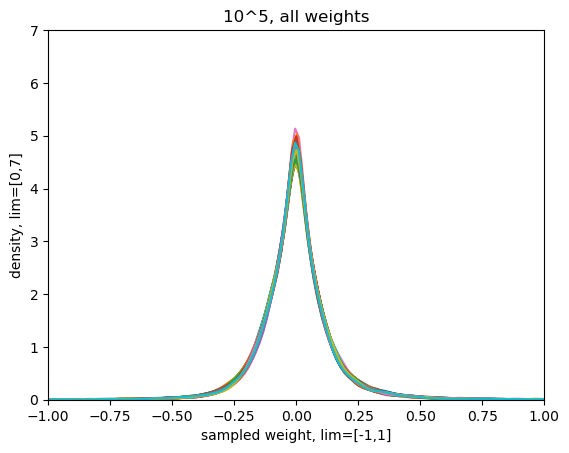

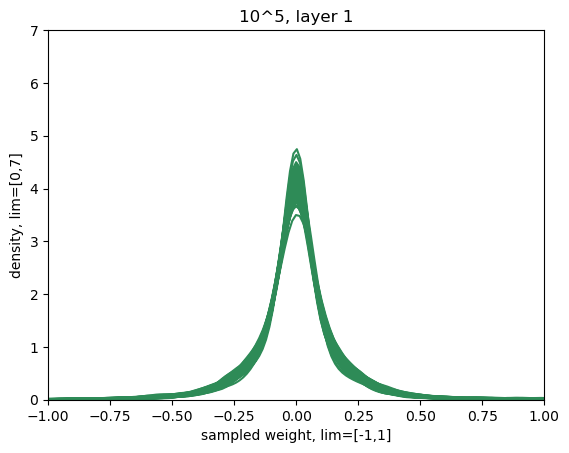

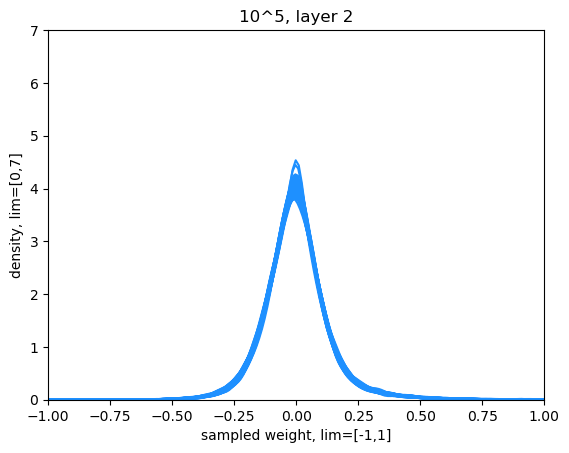

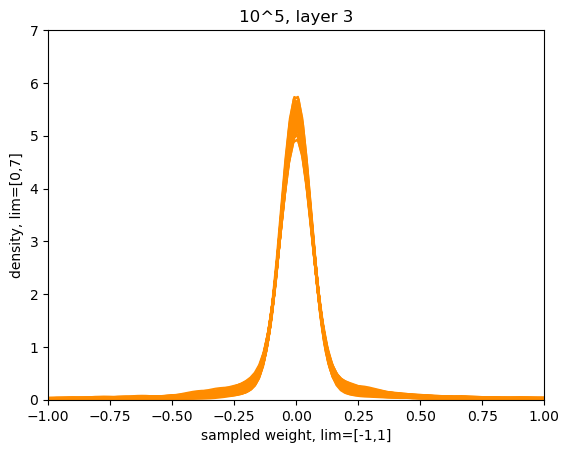

In [37]:
x_min = -1
x_max = 1
y_min = 0
y_max = 7
layers = ['all', 1, 2, 3]
for t in range(4):
    plt.figure()
    for i in range(f_len):
        #plt.plot(e5_x_points[t,i], e5_y_points[t,i], alpha=1)
        plt.plot(e5_x_points[t,i], e5_y_points[t,i], f'{col[t]}')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel(f'sampled weight, lim=[{x_min},{x_max}]')
    plt.ylabel(f'density, lim=[{y_min},{y_max}]')
    plt.title(f'10^5, {title_[t]}')
    plt.savefig(f'../figures/plot_histogram_posterior/e5_layer_{layers[t]}_xmin_{x_min}_xmax_{x_max}_ymin_{y_min}_ymax_{y_max}.png')

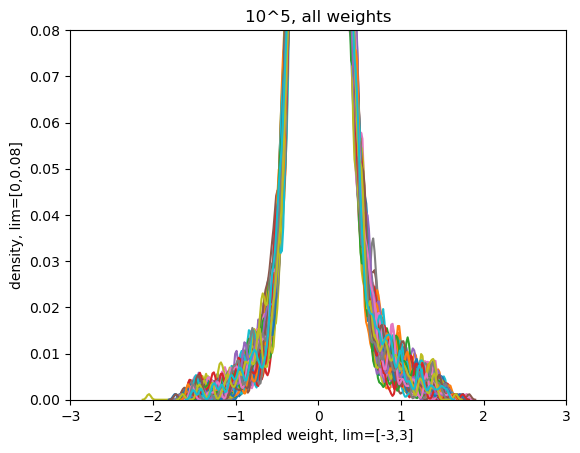

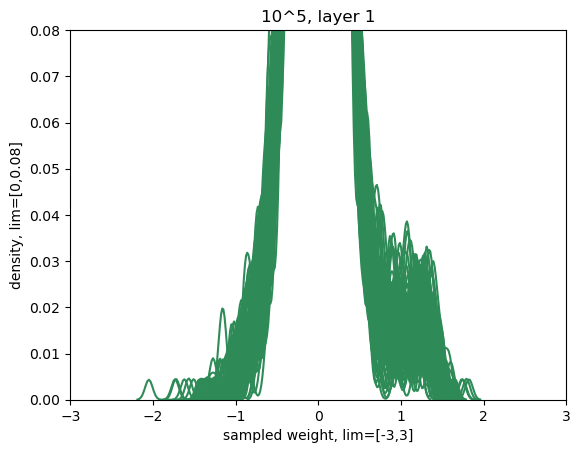

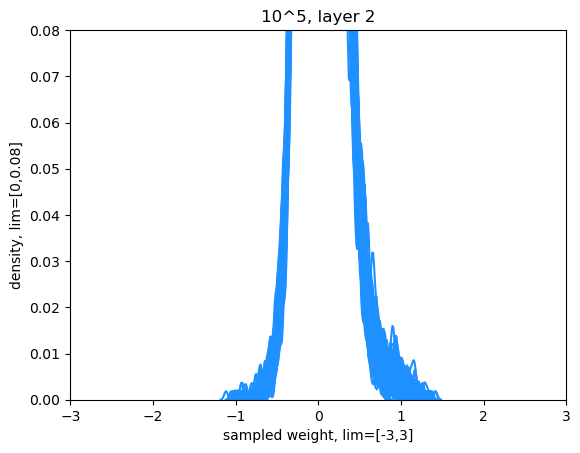

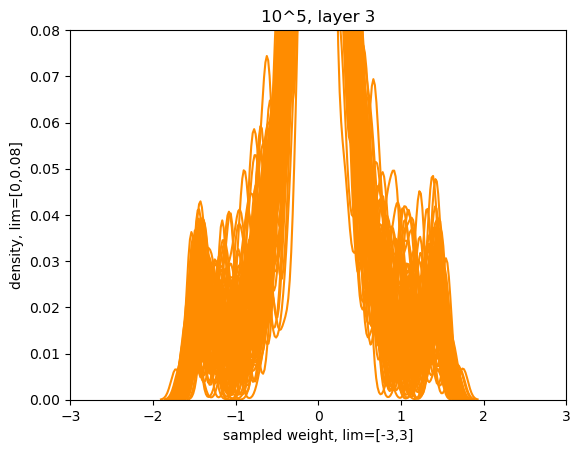

In [38]:
x_min = -3
x_max = 3
y_min = 0
y_max = 0.08
layers = ['all', 1, 2, 3]
for t in range(4):
    plt.figure()
    for i in range(f_len):
        #plt.plot(e5_x_points[t,i], e5_y_points[t,i], alpha=1)
        plt.plot(e5_x_points[t,i], e5_y_points[t,i], f'{col[t]}')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel(f'sampled weight, lim=[{x_min},{x_max}]')
    plt.ylabel(f'density, lim=[{y_min},{y_max}]')
    plt.title(f'10^5, {title_[t]}')
    plt.savefig(f'../figures/plot_histogram_posterior/e5_layer_{layers[t]}_xmin_{x_min}_xmax_{x_max}_ymin_{y_min}_ymax_{y_max}.png')